In [35]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Path Defined

In [36]:
dataset_dir = "/Users/ikehi/Desktop/venv/Final_Year_Project/Signature_dataset"

# ImageDataGenerator for data augmentation

In [37]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Load and augment the data

In [38]:
train_gen = datagen.flow_from_directory(
    directory=dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

Found 96 images belonging to 2 classes.


In [39]:
validation_gen = datagen.flow_from_directory(
    directory=dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 24 images belonging to 2 classes.


# Define the CNN Model

In [40]:
def create_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    return model

model = create_model()

/Users/ikehi/Desktop/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
# I am compiling the model suing Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the Model

In [42]:
history = model.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // train_gen.batch_size,
    validation_data=validation_gen,
    validation_steps=validation_gen.samples // validation_gen.batch_size,
    epochs=50
)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 71s 10s/step - accuracy: 0.5312 - loss: 1.6755 - val_accuracy: 0.5000 - val_loss: 72.3998
Epoch 2/50


2024-07-17 03:23:44.937924: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 687ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 71.0316
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.6016 - loss: 1.2856 - val_accuracy: 0.5000 - val_loss: 81.0682
Epoch 4/50


2024-07-17 03:24:06.711675: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 426ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 81.5166
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.6172 - loss: 0.8755 - val_accuracy: 0.5000 - val_loss: 68.8777
Epoch 6/50


2024-07-17 03:24:28.303853: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 663ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 70.9061
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.5846 - loss: 1.1235 - val_accuracy: 0.5000 - val_loss: 56.4366
Epoch 8/50


2024-07-17 03:24:51.600561: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 689ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 56.4507
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.5924 - loss: 0.9397 - val_accuracy: 0.5000 - val_loss: 46.5274
Epoch 10/50


2024-07-17 03:25:13.972818: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 649ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 46.7041
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.6146 - loss: 0.9184 - val_accuracy: 0.5000 - val_loss: 40.4393
Epoch 12/50


2024-07-17 03:25:37.376580: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 691ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 39.4434
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 40s 6s/step - accuracy: 0.7448 - loss: 0.6041 - val_accuracy: 0.5000 - val_loss: 35.4030
Epoch 14/50


2024-07-17 03:26:19.521645: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 639ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 35.5051
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 24s 7s/step - accuracy: 0.6667 - loss: 0.6389 - val_accuracy: 0.5000 - val_loss: 32.6961
Epoch 16/50


2024-07-17 03:26:45.921565: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 443ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 32.7327
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 6s/step - accuracy: 0.6263 - loss: 0.6617 - val_accuracy: 0.5000 - val_loss: 29.4228
Epoch 18/50


2024-07-17 03:27:10.263128: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 29.0654
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 7s/step - accuracy: 0.6029 - loss: 0.8340 - val_accuracy: 0.5000 - val_loss: 26.0973
Epoch 20/50


2024-07-17 03:27:39.904039: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 642ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 25.5600
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 6s/step - accuracy: 0.6979 - loss: 0.7159 - val_accuracy: 0.5000 - val_loss: 21.5537
Epoch 22/50


2024-07-17 03:28:04.902429: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 695ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 21.9026
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 6s/step - accuracy: 0.6862 - loss: 0.7161 - val_accuracy: 0.5000 - val_loss: 18.6387
Epoch 24/50


2024-07-17 03:28:28.919002: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 689ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 17.8873
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 6s/step - accuracy: 0.7344 - loss: 0.7442 - val_accuracy: 0.5000 - val_loss: 15.1617
Epoch 26/50


2024-07-17 03:28:53.717044: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 655ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 15.4094
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 6s/step - accuracy: 0.6484 - loss: 0.6457 - val_accuracy: 0.5000 - val_loss: 13.4699
Epoch 28/50


2024-07-17 03:29:17.999511: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 673ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 13.4949
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 6s/step - accuracy: 0.7188 - loss: 0.5330 - val_accuracy: 0.5000 - val_loss: 12.2969
Epoch 30/50


2024-07-17 03:29:42.123054: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 740ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 12.4103
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.7122 - loss: 0.5620 - val_accuracy: 0.5000 - val_loss: 12.6332
Epoch 32/50


2024-07-17 03:30:04.384859: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 658ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 12.7502
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 30s 9s/step - accuracy: 0.6523 - loss: 0.7347 - val_accuracy: 0.5000 - val_loss: 12.6902
Epoch 34/50


2024-07-17 03:30:36.051730: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 663ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 12.6159
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 6s/step - accuracy: 0.7812 - loss: 0.4444 - val_accuracy: 0.5000 - val_loss: 11.9862
Epoch 36/50


2024-07-17 03:31:00.938303: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 630ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 11.7469
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 6s/step - accuracy: 0.6354 - loss: 0.6343 - val_accuracy: 0.5000 - val_loss: 10.7177
Epoch 38/50


2024-07-17 03:31:25.019237: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 417ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 10.7788
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 6s/step - accuracy: 0.7435 - loss: 0.5465 - val_accuracy: 0.5000 - val_loss: 9.3599
Epoch 40/50


2024-07-17 03:31:48.384812: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 37s 12s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 9.5449
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.6914 - loss: 0.6180 - val_accuracy: 0.5000 - val_loss: 7.3976
Epoch 42/50


2024-07-17 03:32:38.080830: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 327ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 7.3958
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.7214 - loss: 0.5394 - val_accuracy: 0.5000 - val_loss: 5.6843
Epoch 44/50


2024-07-17 03:32:50.999569: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 364ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 5.6458
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.7422 - loss: 0.6172 - val_accuracy: 0.5000 - val_loss: 3.7762
Epoch 46/50


2024-07-17 03:33:04.337226: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 341ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 3.7462
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.7786 - loss: 0.5545 - val_accuracy: 0.5000 - val_loss: 2.4589
Epoch 48/50


2024-07-17 03:33:17.356132: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 341ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 2.5994
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.7214 - loss: 0.5608 - val_accuracy: 0.5000 - val_loss: 2.0116
Epoch 50/50


2024-07-17 03:33:30.455421: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 352ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.8302


# Test the Model

In [34]:
test_gen = datagen.flow_from_directory(
    directory=dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 120 images belonging to 2 classes.


# Evaluate the Model

In [45]:
test_loss, test_accuracy = model.evaluate(test_gen)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 338ms/step - accuracy: 0.5323 - loss: 1.8537
Test Accuracy: 50.00%


# Predicting on new signatures

In [31]:
new_signature = "/Users/ikehi/Desktop/venv/Final_Year_Project/Signature_dataset/Genuine/person1_1.png"
img = tf.keras.preprocessing.image.load_img(new_signature, target_size=(128, 128))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

prediction = model.predict(img_array)
print(f'Prediction: {"Genuine" if prediction[0] > 0.5 else "Forged"}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Prediction: Forged


In [ ]:
model.save('signature_verification_model2.h5')

In [29]:
# Generating classification report and confusion matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

NameError: name 'X_test' is not defined

# Model Performance Evaluation

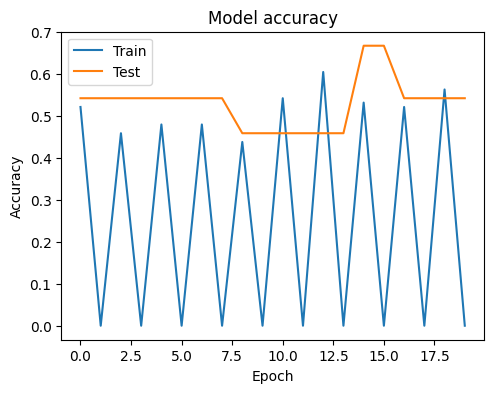

In [26]:
# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

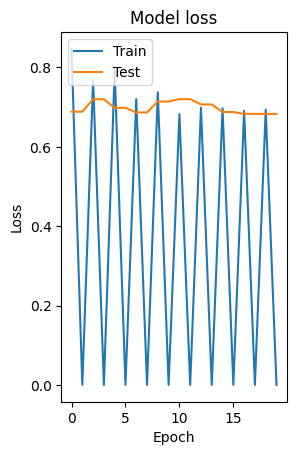

In [27]:
# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

In [39]:
plt.show()

In [46]:
model.save('signature_verification_model2.h5')